# Problem A

## 1) 
The algorithm for greedy approach will be: 
Initially we have an uncoloured graph. First we arrange all the nodes of the graph in some order(random maybe). Go through all the nodes in this arrangement and finalise the color for each node:
    For each node check all its neighbours and mark their colors(ignore if they are uncoloured). After marking these colors, assign the first available color to the current node. 

n = number of nodes
d = maximum degree of the graph

Time Complexity : For each node, we are checking all it's neighbours, so the time complexity will be O(number of nodes * number of neighbours) = )O(n*d)

### Pseudo Code :
![MarineGEO circle logo](../data/img/pseudo-code.jpeg "Code")

## 2)
This solution will always give a valid coloring but it is not necessary that it will give a coloring which uses least colors. Hence it will not always give the optimal solution. Also the upper bound on number of colors used = d+1.

### Graph
![MarineGEO circle logo](../data/img/graph.jpeg "Graph")


## 3) 
In this case number of calls will be less. Again in this case as well we cannot say for sure that we will get optimal coloring.

## 4) 
The sudoku matrix can be converted in a graph where each node is connected to all the nodes of its row, all the nodes of its column and all the nodes of its 3*3 square cell to which it belongs. Now on this graph, we wish to color the nodes such that no two adjacent nodes have the same color.


# Problem B

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### B1

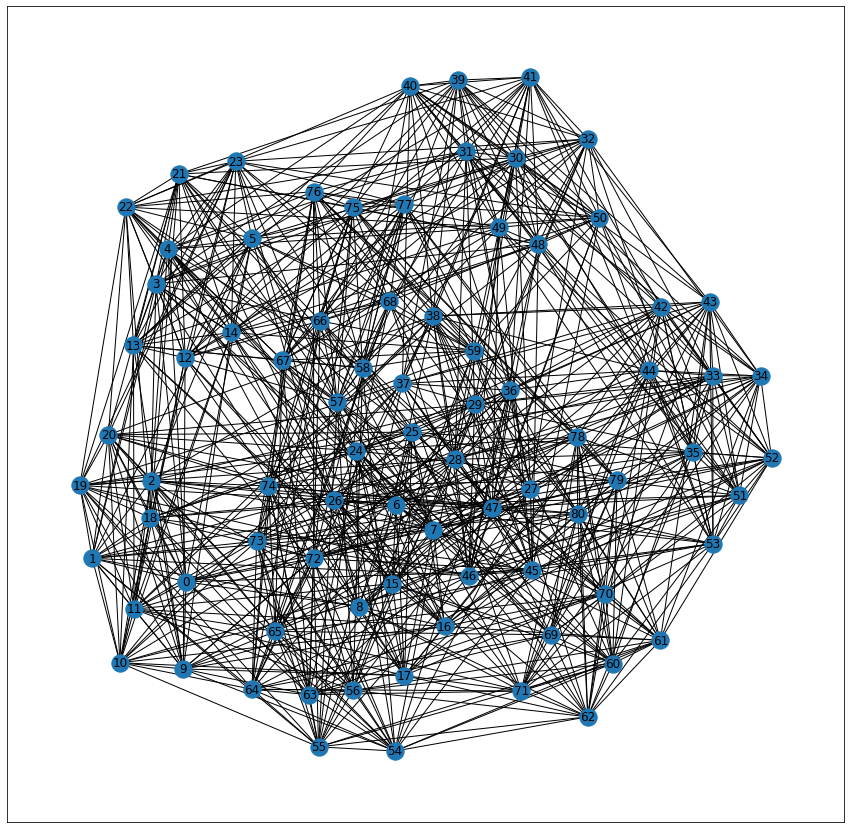

In [3]:
#Question B1) Creating Su Doku

network = nx.sudoku_graph(3)

fig = plt.figure(figsize=(15,15))
nx.draw_networkx(network, with_labels=True)

### B2

In [89]:
#B2 backtracking based approach

def check(graph,curr_node,colorNode,node_colors):
    
    neighbours = list(graph.adj[curr_node])
    
    for n in neighbours:
        if node_colors[n]==-1:
            continue
        if node_colors[n]==colorNode:
            return False
    return True

def backtrack(graph,curr_node_ind,nodes,color_list,node_colors):
    
    #Check if we have checked all nodes and traversed the complete array
    if curr_node_ind==len(nodes):
        return True

    #Check if this node is already colored
    if node_colors[nodes[curr_node_ind]] !=-1:
        return (backtrack(graph,curr_node_ind+1,nodes,color_list,node_colors))

    for colors in color_list:
        if check(graph,nodes[curr_node_ind],colors,node_colors)==True:
            node_colors[nodes[curr_node_ind]] = colors
            isColoringPossible = backtrack(graph,curr_node_ind+1,nodes,color_list,node_colors)
            if isColoringPossible==True:
                return True
    node_colors[curr_node_ind] = -1
    return False

#Required Function: Takes 3 parameters :-
#   graph - given graph
#   k - number of available colors
#   pre_colors = array containing colors(in form of integers b/w 1 to k and -1) where ith index denotes initial color of ith node. If a node is uncolored, its value is -1.
def graph_coloring(graph,k,pre_colors):
    
    #Array containing all nodes
    nodes = list(graph.nodes())

    color_list = np.arange(1,k+1)
    isColoringPossible = backtrack(graph,0,nodes,color_list,pre_colors)  
    
    if isColoringPossible:
        return True
    else:
         return False

Given Graph:


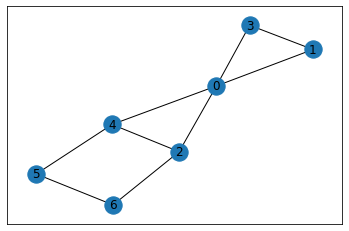

Coloring is POSSIBLE for given graph with given k and it is given below:
['blue', 'orange', 'orange', 'green', 'green', 'blue', 'green']


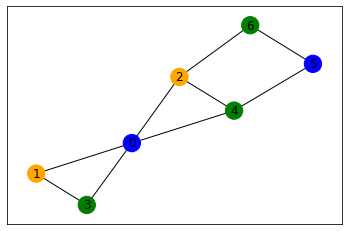

In [90]:
#Sample Test Case:
colors = ["gray","blue","orange","green","aquamarine","olive","purple","pink","yellow","red"]

network = nx.Graph()
network.add_nodes_from([0,1,2])
network.add_edge(0,1)
network.add_edge(0,2)
network.add_nodes_from([3,4,5,6])
network.add_edge(0,3)
network.add_edge(0,4)
network.add_edge(1,3)
network.add_edge(2,4)
network.add_edge(4,5)
network.add_edge(6,2)
network.add_edge(6,5)

pre = [-1,-1,-1,-1,-1,-1,-1]
print("Given Graph:")
nx.draw_networkx(network,with_labels=True)
plt.show()

isColoringPossible = graph_coloring(network,4,pre)

if isColoringPossible==False:
    print("Coloring is NOT POSSIBLE for given graph with given k")
else:
    print("Coloring is POSSIBLE for given graph with given k and it is given below:")
    #print(pre)
    colorList=[]       
    for i in range(0,7):
        if pre[i]==-1:
            colorList.append(colors[0])
        else:
            colorList.append(colors[pre[i]])
    print(colorList)
    nx.draw_networkx(network,node_color=colorList,with_labels=True)
    plt.show()


### B3

In [104]:
#To plot sudoku:
def show_graph(curr_colors,colors):
    #print(curr_colors)
    colorList=[]       
    for i in range(0,81):
        if curr_colors[i]==-1:
            colorList.append(colors[0])
        else:
            colorList.append(colors[curr_colors[i]])
    #print(colorList)
    fig = plt.figure(figsize=(15,15))
    nx.draw_networkx(network,node_color=colorList,with_labels=True)
    plt.show()

### Easy Sudoku:

In [105]:
def easy_define_curr_colors(curr_colors):
    curr_colors[0] = 5
    curr_colors[1] = 1
    curr_colors[3] = 8
    curr_colors[7] = 3
    curr_colors[8] = 9
    curr_colors[11] = 6
    curr_colors[12] = 3
    curr_colors[17] = 7
    curr_colors[19] = 3 
    curr_colors[21] = 6
    curr_colors[22] = 9
    curr_colors[23] = 4
    curr_colors[25] = 2
    curr_colors[29] = 7
    curr_colors[30] = 2
    curr_colors[35] = 4
    curr_colors[36] = 3
    curr_colors[37] = 9
    curr_colors[43] = 7
    curr_colors[44] = 6
    curr_colors[45] = 1
    curr_colors[50] = 6
    curr_colors[51] = 8
    curr_colors[55] = 6 
    curr_colors[57] = 4 
    curr_colors[58] = 7
    curr_colors[59] = 1
    curr_colors[61] = 5
    curr_colors[63] = 4
    curr_colors[68] = 2
    curr_colors[69] = 1
    curr_colors[72] = 8
    curr_colors[73] = 5
    curr_colors[77] = 3
    curr_colors[79] = 4
    curr_colors[80] = 2 

Given Graph: (Grey color denotes uncolored nodes)


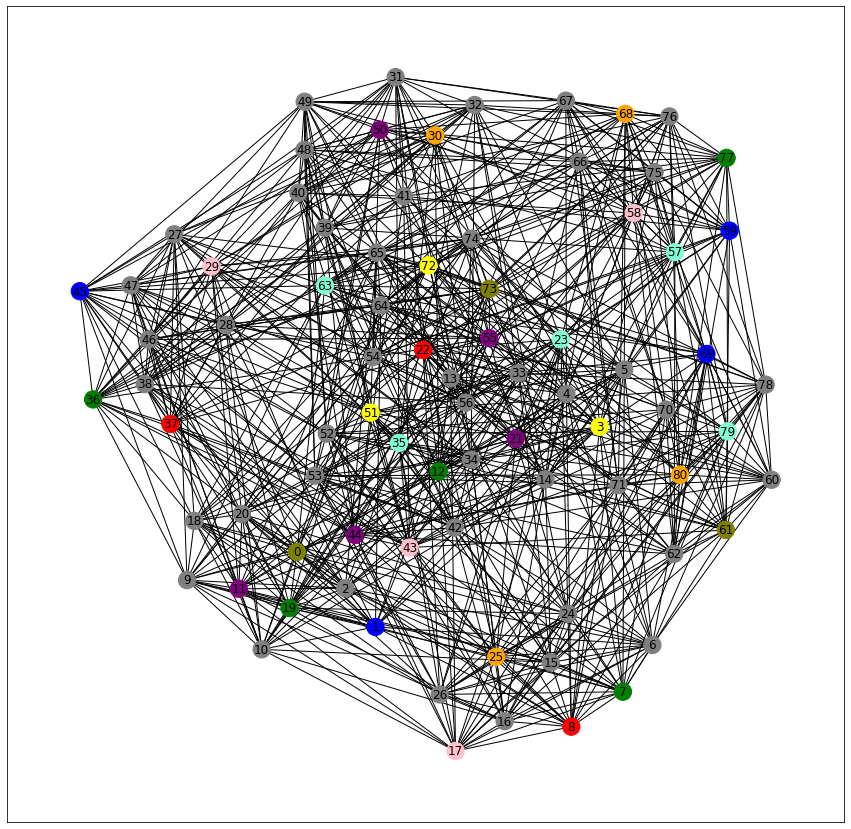

Coloring is POSSIBLE for given graph with given k and it is given below:


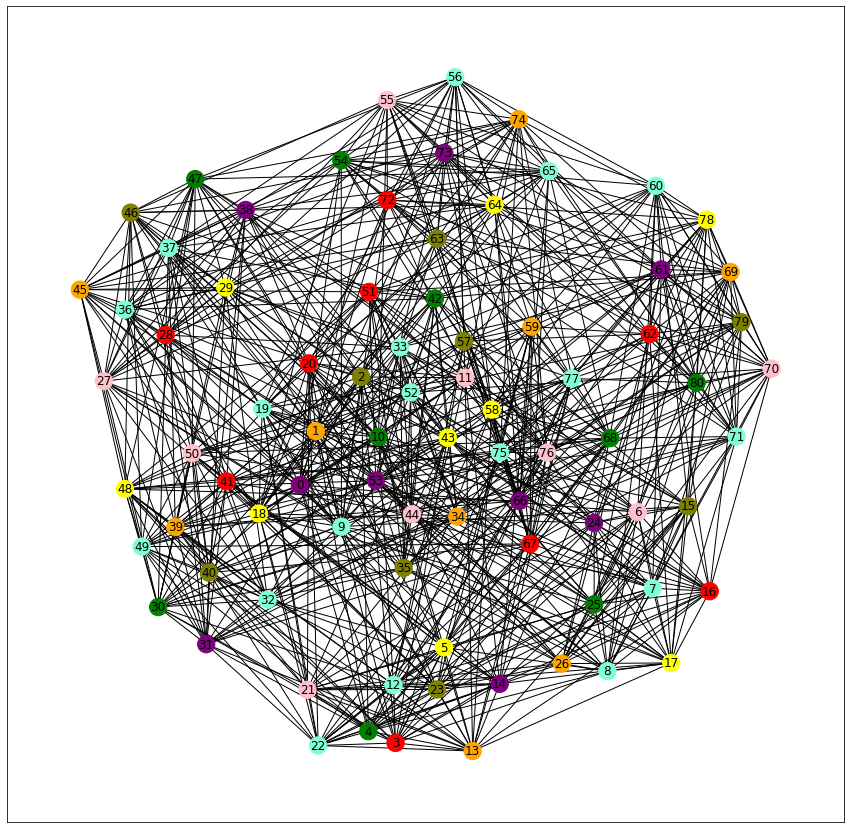

In [112]:
#Sudoku graph is taken corresponding to birthday = 16 september
colors = ["gray","blue","orange","green","aquamarine","olive","purple","pink","yellow","red"]

#Defining initial sudoku colors
curr_colors = [-1]*81
easy_define_curr_colors(curr_colors)

network = nx.sudoku_graph(3)
print("Given Graph: (Grey color denotes uncolored nodes)")
show_graph(curr_colors,colors)

#In case of sudoku, k = 9
isColoringPossible = graph_coloring(network,9,curr_colors)      #This function updates the list curr_colors if valid combination is possible

if isColoringPossible==False:
    print("Coloring is NOT POSSIBLE for given graph with given k")
else:
    print("Coloring is POSSIBLE for given graph with given k and it is given below:")
    show_graph(curr_colors,colorList)


### Tough Sudoku:

In [109]:
def tough_define_curr_color(curr_colors):
    curr_colors[5] = 1
    curr_colors[6] = 2
    curr_colors[8] = 8
    curr_colors[9] = 9
    curr_colors[12] = 2
    curr_colors[21] = 6
    curr_colors[22] = 8
    curr_colors[27] = 3
    curr_colors[29] = 8
    curr_colors[34] = 2
    curr_colors[38] = 1 
    curr_colors[40] = 5
    curr_colors[42] = 9
    curr_colors[46] = 4
    curr_colors[51] = 3
    curr_colors[53] = 7
    curr_colors[58] = 7
    curr_colors[59] = 4
    curr_colors[68] = 9
    curr_colors[71] = 6
    curr_colors[72] = 5
    curr_colors[74] = 3
    curr_colors[75] = 1

Given Graph: (Grey color denotes uncolored nodes)


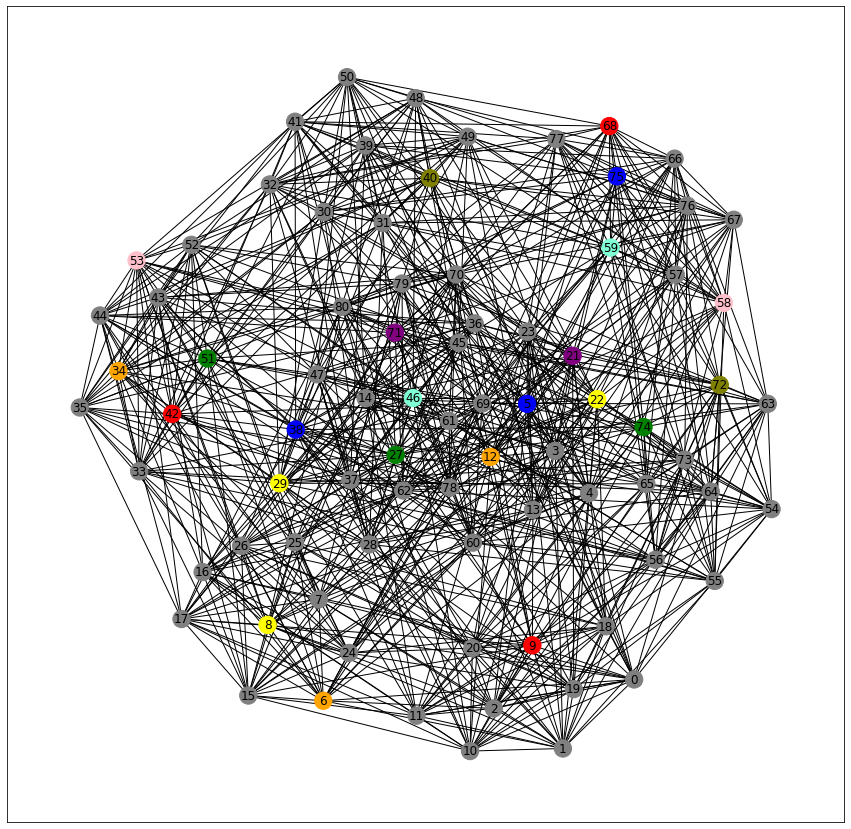

Coloring is POSSIBLE for given graph with given k and it is given below:


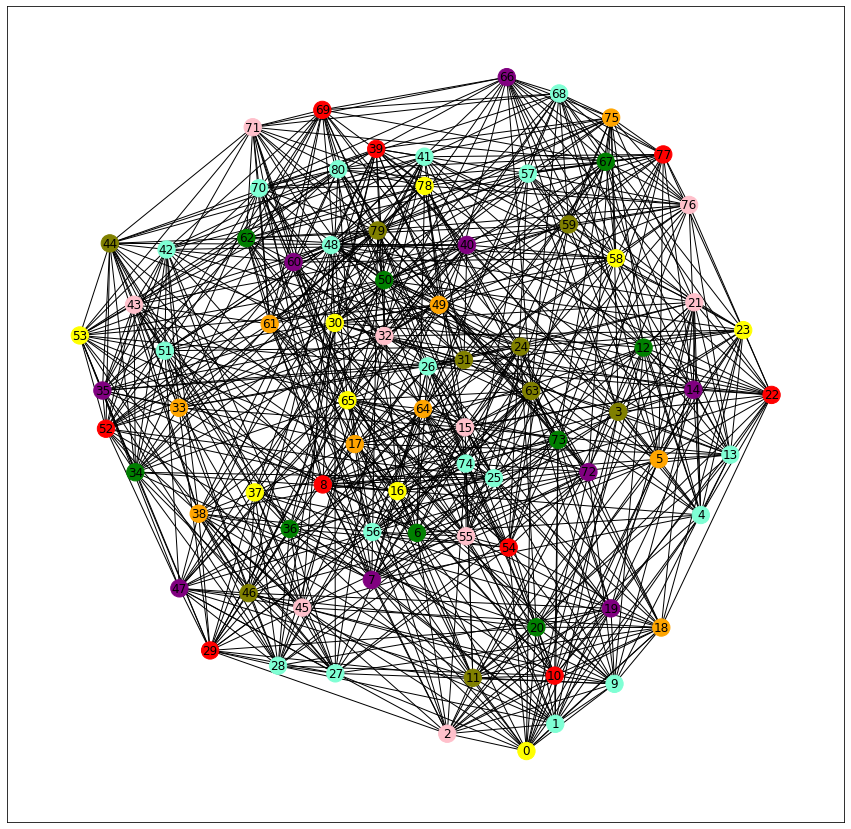

In [110]:
#Sudoku graph is taken corresponding to birthday = 16 september
colors = ["gray","blue","orange","green","aquamarine","olive","purple","pink","yellow","red"]

#Defining initial sudoku colors
curr_colors = [-1]*81
tough_define_curr_color(curr_colors)

network = nx.sudoku_graph(3)
print("Given Graph: (Grey color denotes uncolored nodes)")
show_graph(curr_colors,colors)

#In case of sudoku, k = 9
isColoringPossible = graph_coloring(network,9,curr_colors)      #This function updates the list curr_colors if valid combination is possible

if isColoringPossible==False:
    print("Coloring is NOT POSSIBLE for given graph with given k")
else:
    print("Coloring is POSSIBLE for given graph with given k and it is given below:")
    show_graph(curr_colors,colorList)


# Problem C)

In [37]:
import pandas as pd
import random
import itertools

In [38]:
student_data = pd.read_csv("../data/archive/synthetic_school_enrollment_data.csv")
student_data.rename( columns={'Unnamed: 0':'Name'}, inplace=True )

name_list = list(student_data['Name'])
student_data.set_index("Name", inplace = True)
courses = list(student_data.columns)[2:]

In [39]:
#Define graph using nodes as course name
network = nx.Graph()
network.add_nodes_from(courses)     

In [40]:
without_subj = student_data.drop(["Major", "Minor"], axis=1) # We don’t need major and minor for the moment
without_subj = without_subj.T # transpose

list_of_overlaps = []   
for student in name_list:
    list_of_overlaps.append(list(without_subj.loc[without_subj[student]].index))

for sublist in list_of_overlaps:
    for pair in itertools.combinations(sublist, 2):
          network.add_edge(pair[0], pair[1])

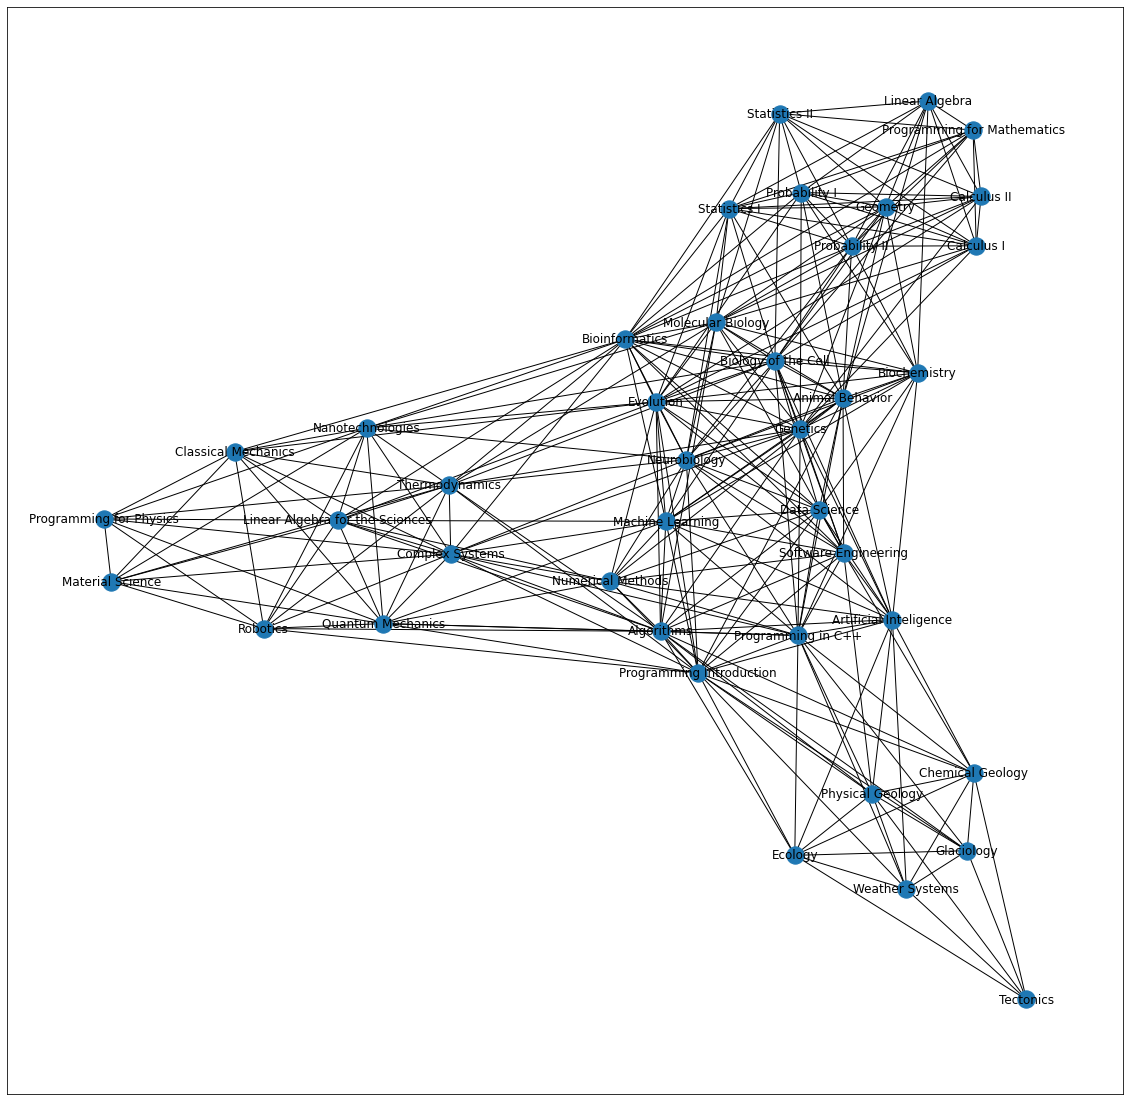

In [46]:
n_edges_total = len(list(network.edges))
n_nodes = len(list(network.nodes))
n_edges_possible = (n_nodes*(n_nodes-1))/2
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(network, with_labels=True)

#### Upper bound on number of colors used by greedy algorithm = max(dict(network.degree).values()))

In [41]:
colors = [
"lightcoral", "gray", "lightgray", "firebrick", "red", "chocolate", "darkorange", "moccasin", "gold", "yellow", "darkolivegreen", "chartreuse", "forestgreen", "lime", "mediumaquamarine", "turquoise", "teal", "cadetblue", "dogerblue", "blue", "slateblue", "blueviolet", "magenta", "lightsteelblue"]

In [42]:
from datetime import datetime
dates = []
calendar = {}
for i in list(range(14,20)):
    for j in list(range(10,18,2)):
        date = datetime(2021, 6, i, j, 0)
        dates.append(date)
        calendar[date] = []

In [43]:
from_color_to_date = {col: dates[i] for i, col in enumerate(colors)}

In [44]:
def greedy_coloring_algorithm(network, colors):
    nodes = list(network.nodes()) 
    random.shuffle(nodes)
    for node in nodes:
        dict_neighbors = dict(network[node])
        nodes_neighbors = list(dict_neighbors.keys())
        
        forbidden_colors = []
        for neighbor in nodes_neighbors:
            if len(network.nodes.data()[neighbor].keys()) == 0: 
                continue
            else:
                forbidden_color = network.nodes.data()[neighbor]
                forbidden_color = forbidden_color['color']                
                forbidden_colors.append(forbidden_color)
        for color in colors:
            if color in forbidden_colors:
                continue
            else:
                network.nodes[node]['color'] = color
                break

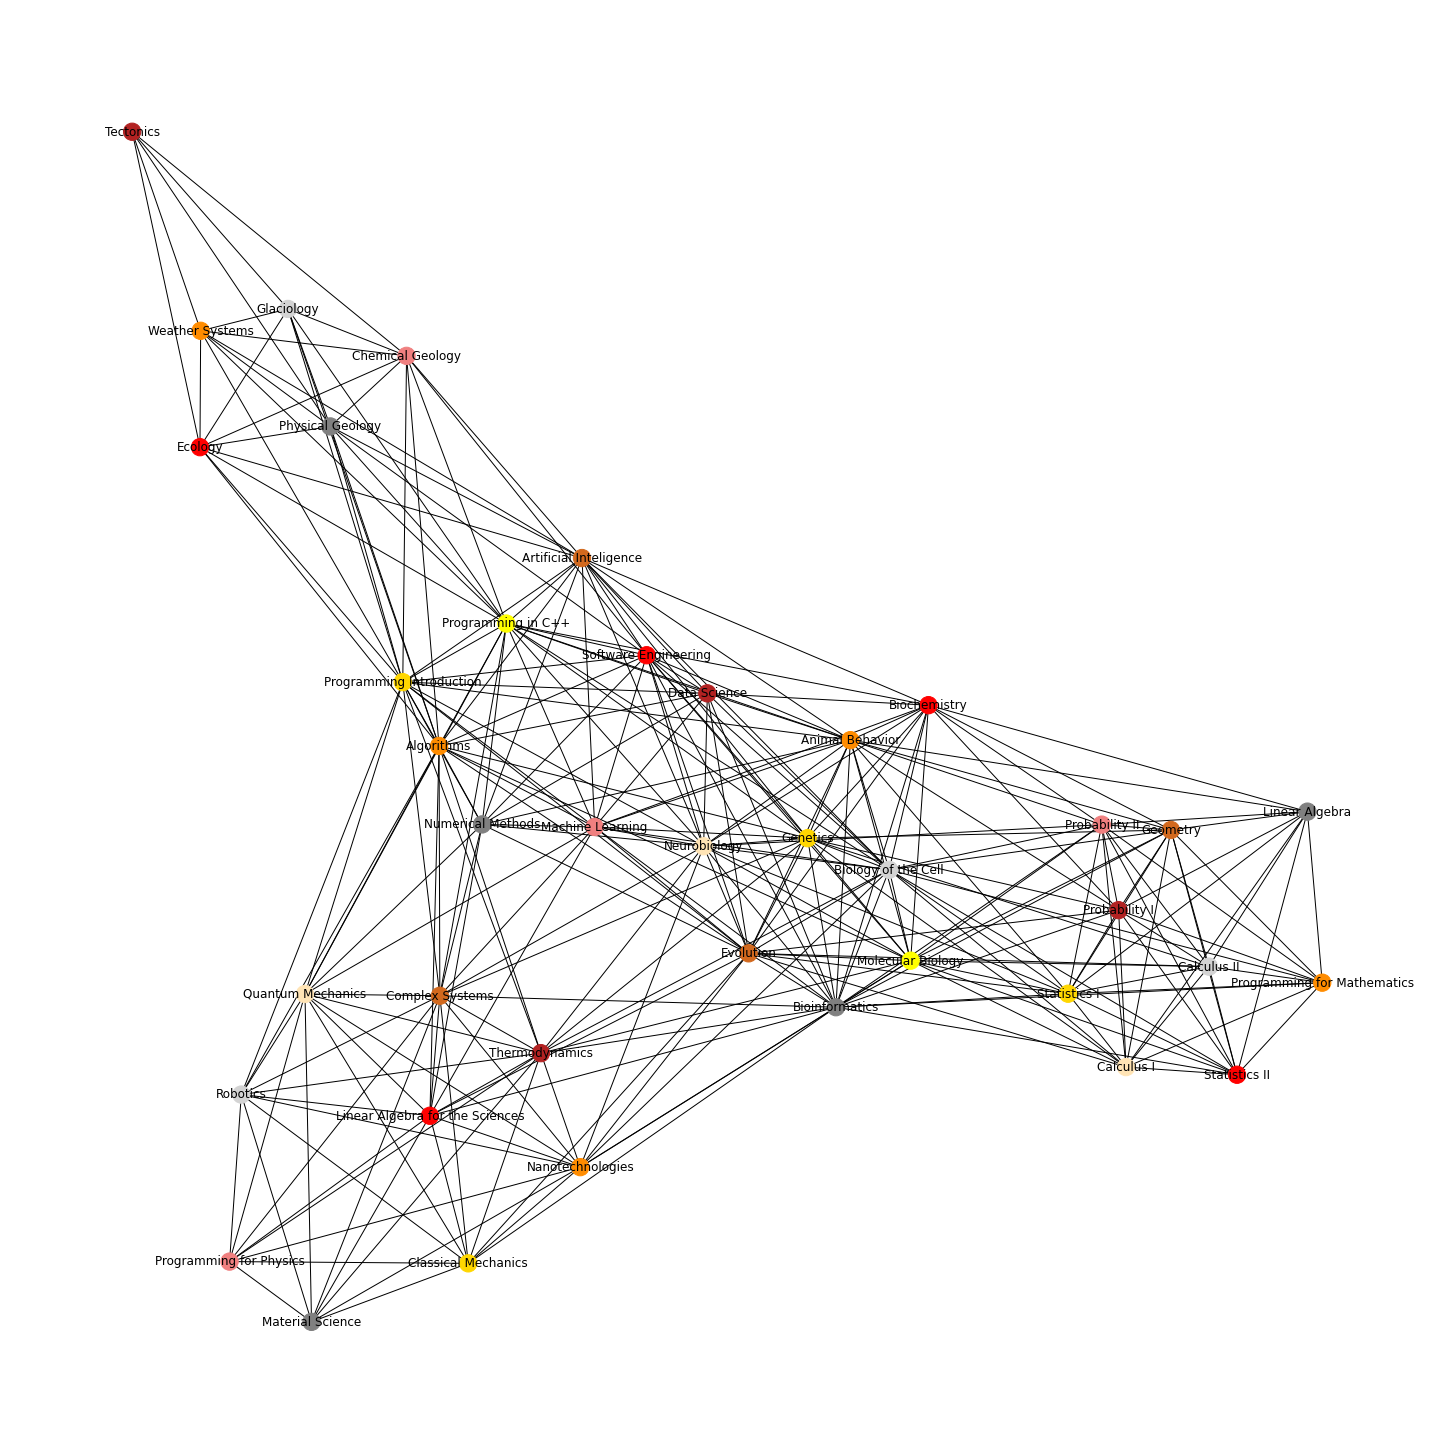

In [45]:
#Calling the function:
greedy_coloring_algorithm(network, colors)

colors_nodes = [data["color"] for v, data in network.nodes(data=True)]    
fig = plt.figure(figsize=(20,20))
nx.draw(network, node_color=colors_nodes, with_labels=True)

Hence we are able to visualise the coloring of the graph where nodes denote subject names and their color denote their exam schedule.
We can see that no two adjacent nodes are colored same.